### Purpose: 
Script to plot some basic cone activation responses to spectra of single wavelength

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cone as c

In [2]:
lmbda = np.arange(350,720,10)
cL = list(map(c.cone_L,lmbda))
cM = list(map(c.cone_M,lmbda))
cS = list(map(c.cone_S,lmbda))

<IPython.core.display.Javascript object>


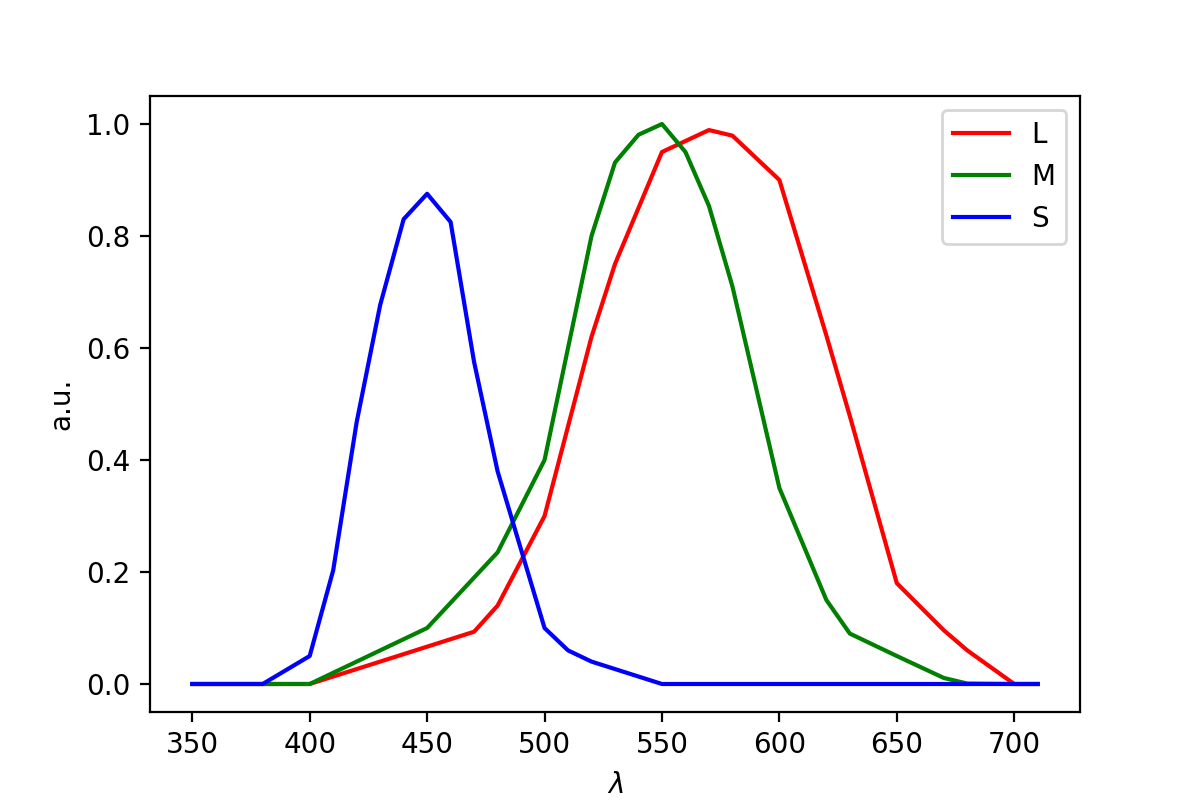

In [3]:
%matplotlib notebook
fig,ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
ax.plot(lmbda,cL, 'red')
ax.plot(lmbda,cM, 'green')
ax.plot(lmbda,cS, 'blue')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('a.u.')
ax.legend(['L','M','S'])
plt.savefig('results/cone_activation.pdf')

<IPython.core.display.Javascript object>


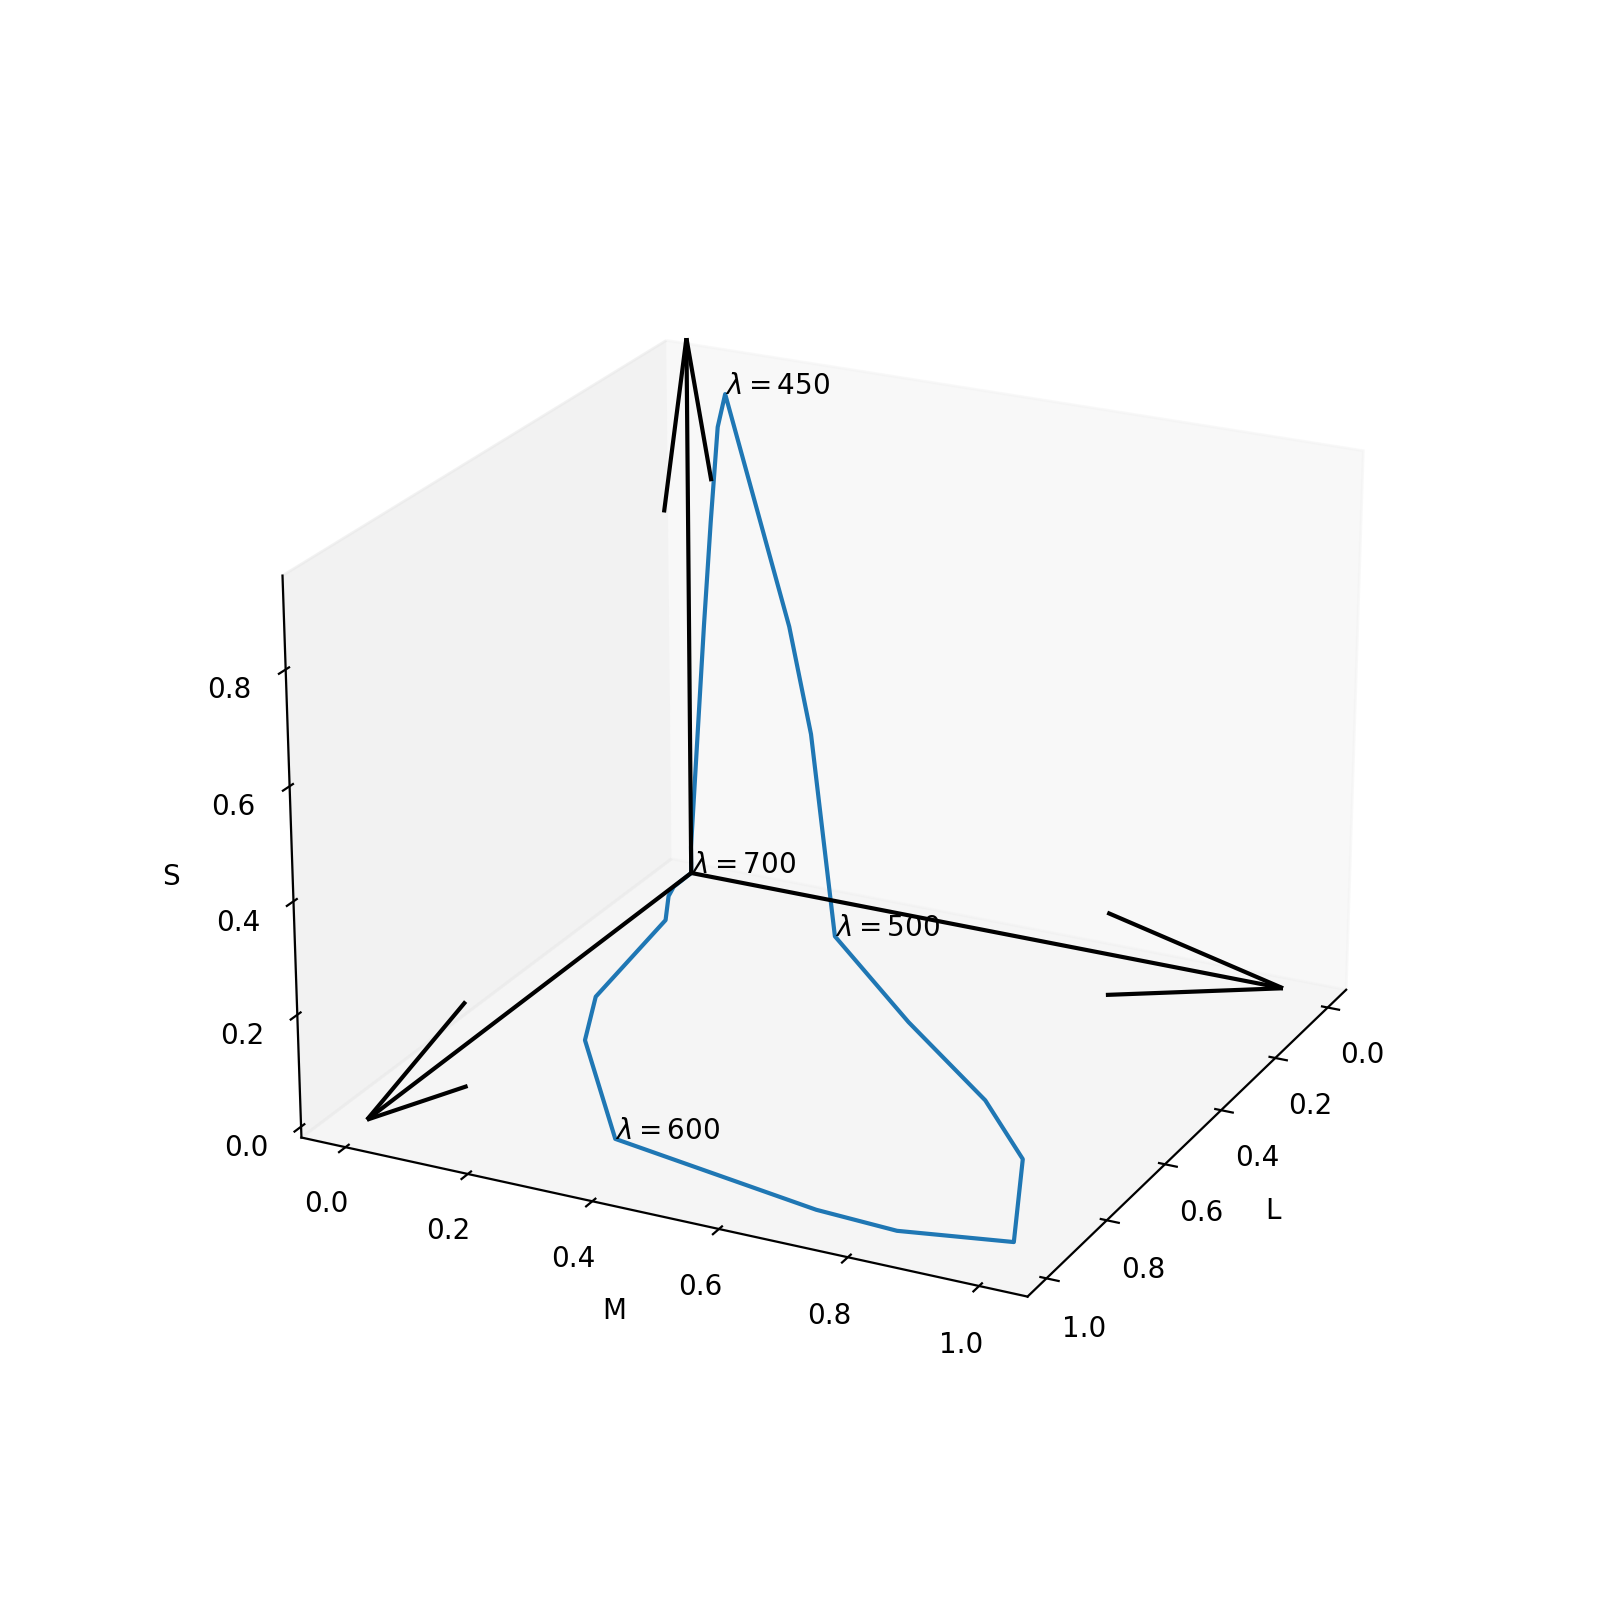

In [4]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

lblrange = np.asarray([450,500,600,700])
for lbl in lblrange:
    ax.text(c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl),'$\lambda=%d$'%(lbl))
ax.plot(cL,cM,cS)
ax.quiver(0,0,0, 1,0,0, color="black",length=1)
ax.quiver(0,0,0, 0,1,0, color="black",length=1)
ax.quiver(0,0,0, 0,0,1, color="black",length=1)
ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('S')
ax.grid(False)
ax.view_init(22.305194805197175, 26.266233766235814)
plt.show()
plt.savefig('results/cone_activation3d.pdf')